# Prepare a classification model using SVM for salary data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [2]:
train=pd.read_csv('C:/Users/Osama Khan/OneDrive/Documents/Data Science/Assignment/Assignment 17 support vector machines/SalaryData_Train(1).csv')
test=pd.read_csv('C:/Users/Osama Khan/OneDrive/Documents/Data Science/Assignment/Assignment 17 support vector machines/SalaryData_Test(1).csv')

In [3]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
label_encoder=preprocessing.LabelEncoder()

In [6]:
list=['workclass','education','educationno','maritalstatus','occupation','relationship','race','sex','native']

In [7]:
train['workclass']=label_encoder.fit_transform(train['workclass'])
train['education']=label_encoder.fit_transform(train['education'])
train['educationno']=label_encoder.fit_transform(train['educationno'])
train['maritalstatus']=label_encoder.fit_transform(train['maritalstatus'])
train['occupation']=label_encoder.fit_transform(train['occupation'])
train['relationship']=label_encoder.fit_transform(train['relationship'])
train['race']=label_encoder.fit_transform(train['race'])
train['sex']=label_encoder.fit_transform(train['sex'])
train['native']=label_encoder.fit_transform(train['native'])
train['Salary']=label_encoder.fit_transform(train['Salary'])

In [8]:
test['workclass']=label_encoder.fit_transform(test['workclass'])
test['education']=label_encoder.fit_transform(test['education'])
test['educationno']=label_encoder.fit_transform(test['educationno'])
test['maritalstatus']=label_encoder.fit_transform(test['maritalstatus'])
test['occupation']=label_encoder.fit_transform(test['occupation'])
test['relationship']=label_encoder.fit_transform(test['relationship'])
test['race']=label_encoder.fit_transform(test['race'])
test['sex']=label_encoder.fit_transform(test['sex'])
test['native']=label_encoder.fit_transform(test['native'])
test['Salary']=label_encoder.fit_transform(test['Salary'])

In [9]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,12,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,12,2,3,0,4,1,0,0,13,37,0
2,38,2,11,8,0,5,1,4,1,0,0,40,37,0
3,53,2,1,6,2,5,0,2,1,0,0,40,37,0
4,28,2,9,12,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,11,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,8,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,8,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,8,4,0,3,4,1,0,0,20,37,0


In [10]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,6,4,6,3,2,1,0,0,40,37,0
1,38,2,11,8,2,4,0,4,1,0,0,50,37,0
2,28,1,7,11,2,10,0,4,1,0,0,40,37,1
3,44,2,15,9,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,5,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,12,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,12,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,12,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,12,0,0,3,1,1,5455,0,40,37,0


In [11]:
train.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,30161.000000,30161.00000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,2.19933,10.33361,9.121316,2.580087,5.959849,1.418322,3.678592,0.675707,1092.044064,88.302311,40.931269,35.413481,0.248931
std,13.134830,0.95394,3.81226,2.550037,1.498018,4.029633,1.601361,0.834721,0.468118,7406.466611,404.121321,11.980182,5.956430,0.432401
min,17.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.00000,9.00000,8.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,37.000000,2.00000,11.00000,9.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,47.000000,2.00000,12.00000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,0.000000
max,90.000000,6.00000,15.00000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,1.000000


In [12]:
test.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,2.214874,10.272377,9.112749,2.595286,5.989044,1.401394,3.683665,0.673772,1120.301594,89.041899,40.951594,35.467596,0.245684
std,13.380676,0.966422,3.826251,2.558727,1.505336,4.020113,1.588954,0.827630,0.468848,7703.181842,406.283245,12.062831,5.880922,0.430506
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,9.000000,8.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,37.000000,2.000000,11.000000,9.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,48.000000,2.000000,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,0.000000
max,90.000000,6.000000,15.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,39.000000,1.000000


In [13]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [54]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [55]:
train.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
age,1.000000,0.080537,-0.001091,0.043525,-0.276363,-0.005682,-0.246452,0.023380,0.081972,0.080152,0.060278,0.101598,-0.001548
workclass,0.080537,1.000000,0.017864,0.037833,-0.034235,0.015572,-0.067414,0.044734,0.074966,0.035349,0.007244,0.050723,0.007598
education,-0.001091,0.017864,1.000000,0.345420,-0.040704,-0.038213,-0.012732,0.011139,-0.027831,0.030582,0.014822,0.059892,0.079715
educationno,0.043525,0.037833,0.345420,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006155,0.124416,0.079691,0.152522,0.092625
maritalstatus,-0.276363,-0.034235,-0.040704,-0.063419,1.000000,0.022655,0.177955,-0.068641,-0.119774,-0.042414,-0.035385,-0.189004,-0.026057
occupation,-0.005682,0.015572,-0.038213,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062316,0.022162,0.014612,0.018365,-0.003298
relationship,-0.246452,-0.067414,-0.012732,-0.091935,0.177955,-0.053727,1.000000,-0.117148,-0.584881,-0.058257,-0.063659,-0.257850,-0.010661
race,0.023380,0.044734,0.011139,0.032805,-0.068641,0.000717,-0.117148,1.000000,0.089207,0.014355,0.023461,0.048533,0.126507
sex,0.081972,0.074966,-0.027831,0.006155,-0.119774,0.062316,-0.584881,0.089207,1.000000,0.048809,0.047285,0.231272,0.000063
capitalgain,0.080152,0.035349,0.030582,0.124416,-0.042414,0.022162,-0.058257,0.014355,0.048809,1.000000,-0.032218,0.080431,0.008513


In [56]:
test.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
age,1.000000,0.096037,-0.007948,0.026123,-0.262577,-0.002214,-0.249701,0.024485,0.082265,0.078760,0.057745,0.102758,-0.005683
workclass,0.096037,1.000000,0.018005,0.046623,-0.031329,0.021271,-0.060235,0.059749,0.059161,0.032980,0.010242,0.052614,-0.003635
education,-0.007948,0.018005,1.000000,0.351486,-0.043117,-0.023999,-0.014227,0.012133,-0.026978,0.028626,0.020568,0.062892,0.077065
educationno,0.026123,0.046623,0.351486,1.000000,-0.068079,0.093643,-0.081413,0.029355,-0.002052,0.131750,0.085817,0.133691,0.097188
maritalstatus,-0.262577,-0.031329,-0.043117,-0.068079,1.000000,0.003854,0.185495,-0.073718,-0.120374,-0.042405,-0.034073,-0.171665,-0.016532
occupation,-0.002214,0.021271,-0.023999,0.093643,0.003854,1.000000,-0.047381,-0.001561,0.045244,0.014165,0.016580,0.011755,-0.001311
relationship,-0.249701,-0.060235,-0.014227,-0.081413,0.185495,-0.047381,1.000000,-0.121481,-0.579212,-0.054040,-0.048091,-0.261905,0.000500
race,0.024485,0.059749,0.012133,0.029355,-0.073718,-0.001561,-0.121481,1.000000,0.088450,0.013539,0.015799,0.037125,0.125514
sex,0.082265,0.059161,-0.026978,-0.002052,-0.120374,0.045244,-0.579212,0.088450,1.000000,0.044843,0.045360,0.231744,-0.014178
capitalgain,0.078760,0.032980,0.028626,0.131750,-0.042405,0.014165,-0.054040,0.013539,0.044843,1.000000,-0.031876,0.090501,0.005923


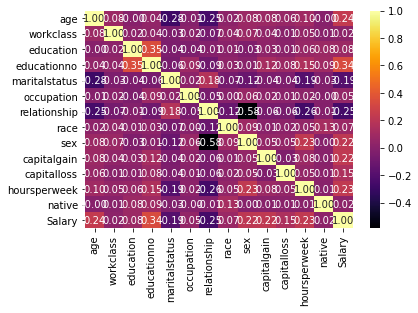

In [33]:
sns.heatmap(train.corr(),annot=True,cmap='inferno',fmt='.2f')
ax=plt.gca()

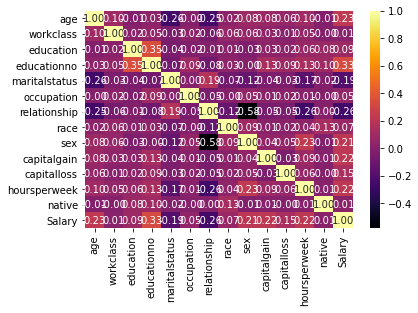

In [34]:
sns.heatmap(test.corr(),annot=True,cmap='inferno',fmt='.2f')
ax=plt.gca()

<Figure size 2160x1296 with 0 Axes>

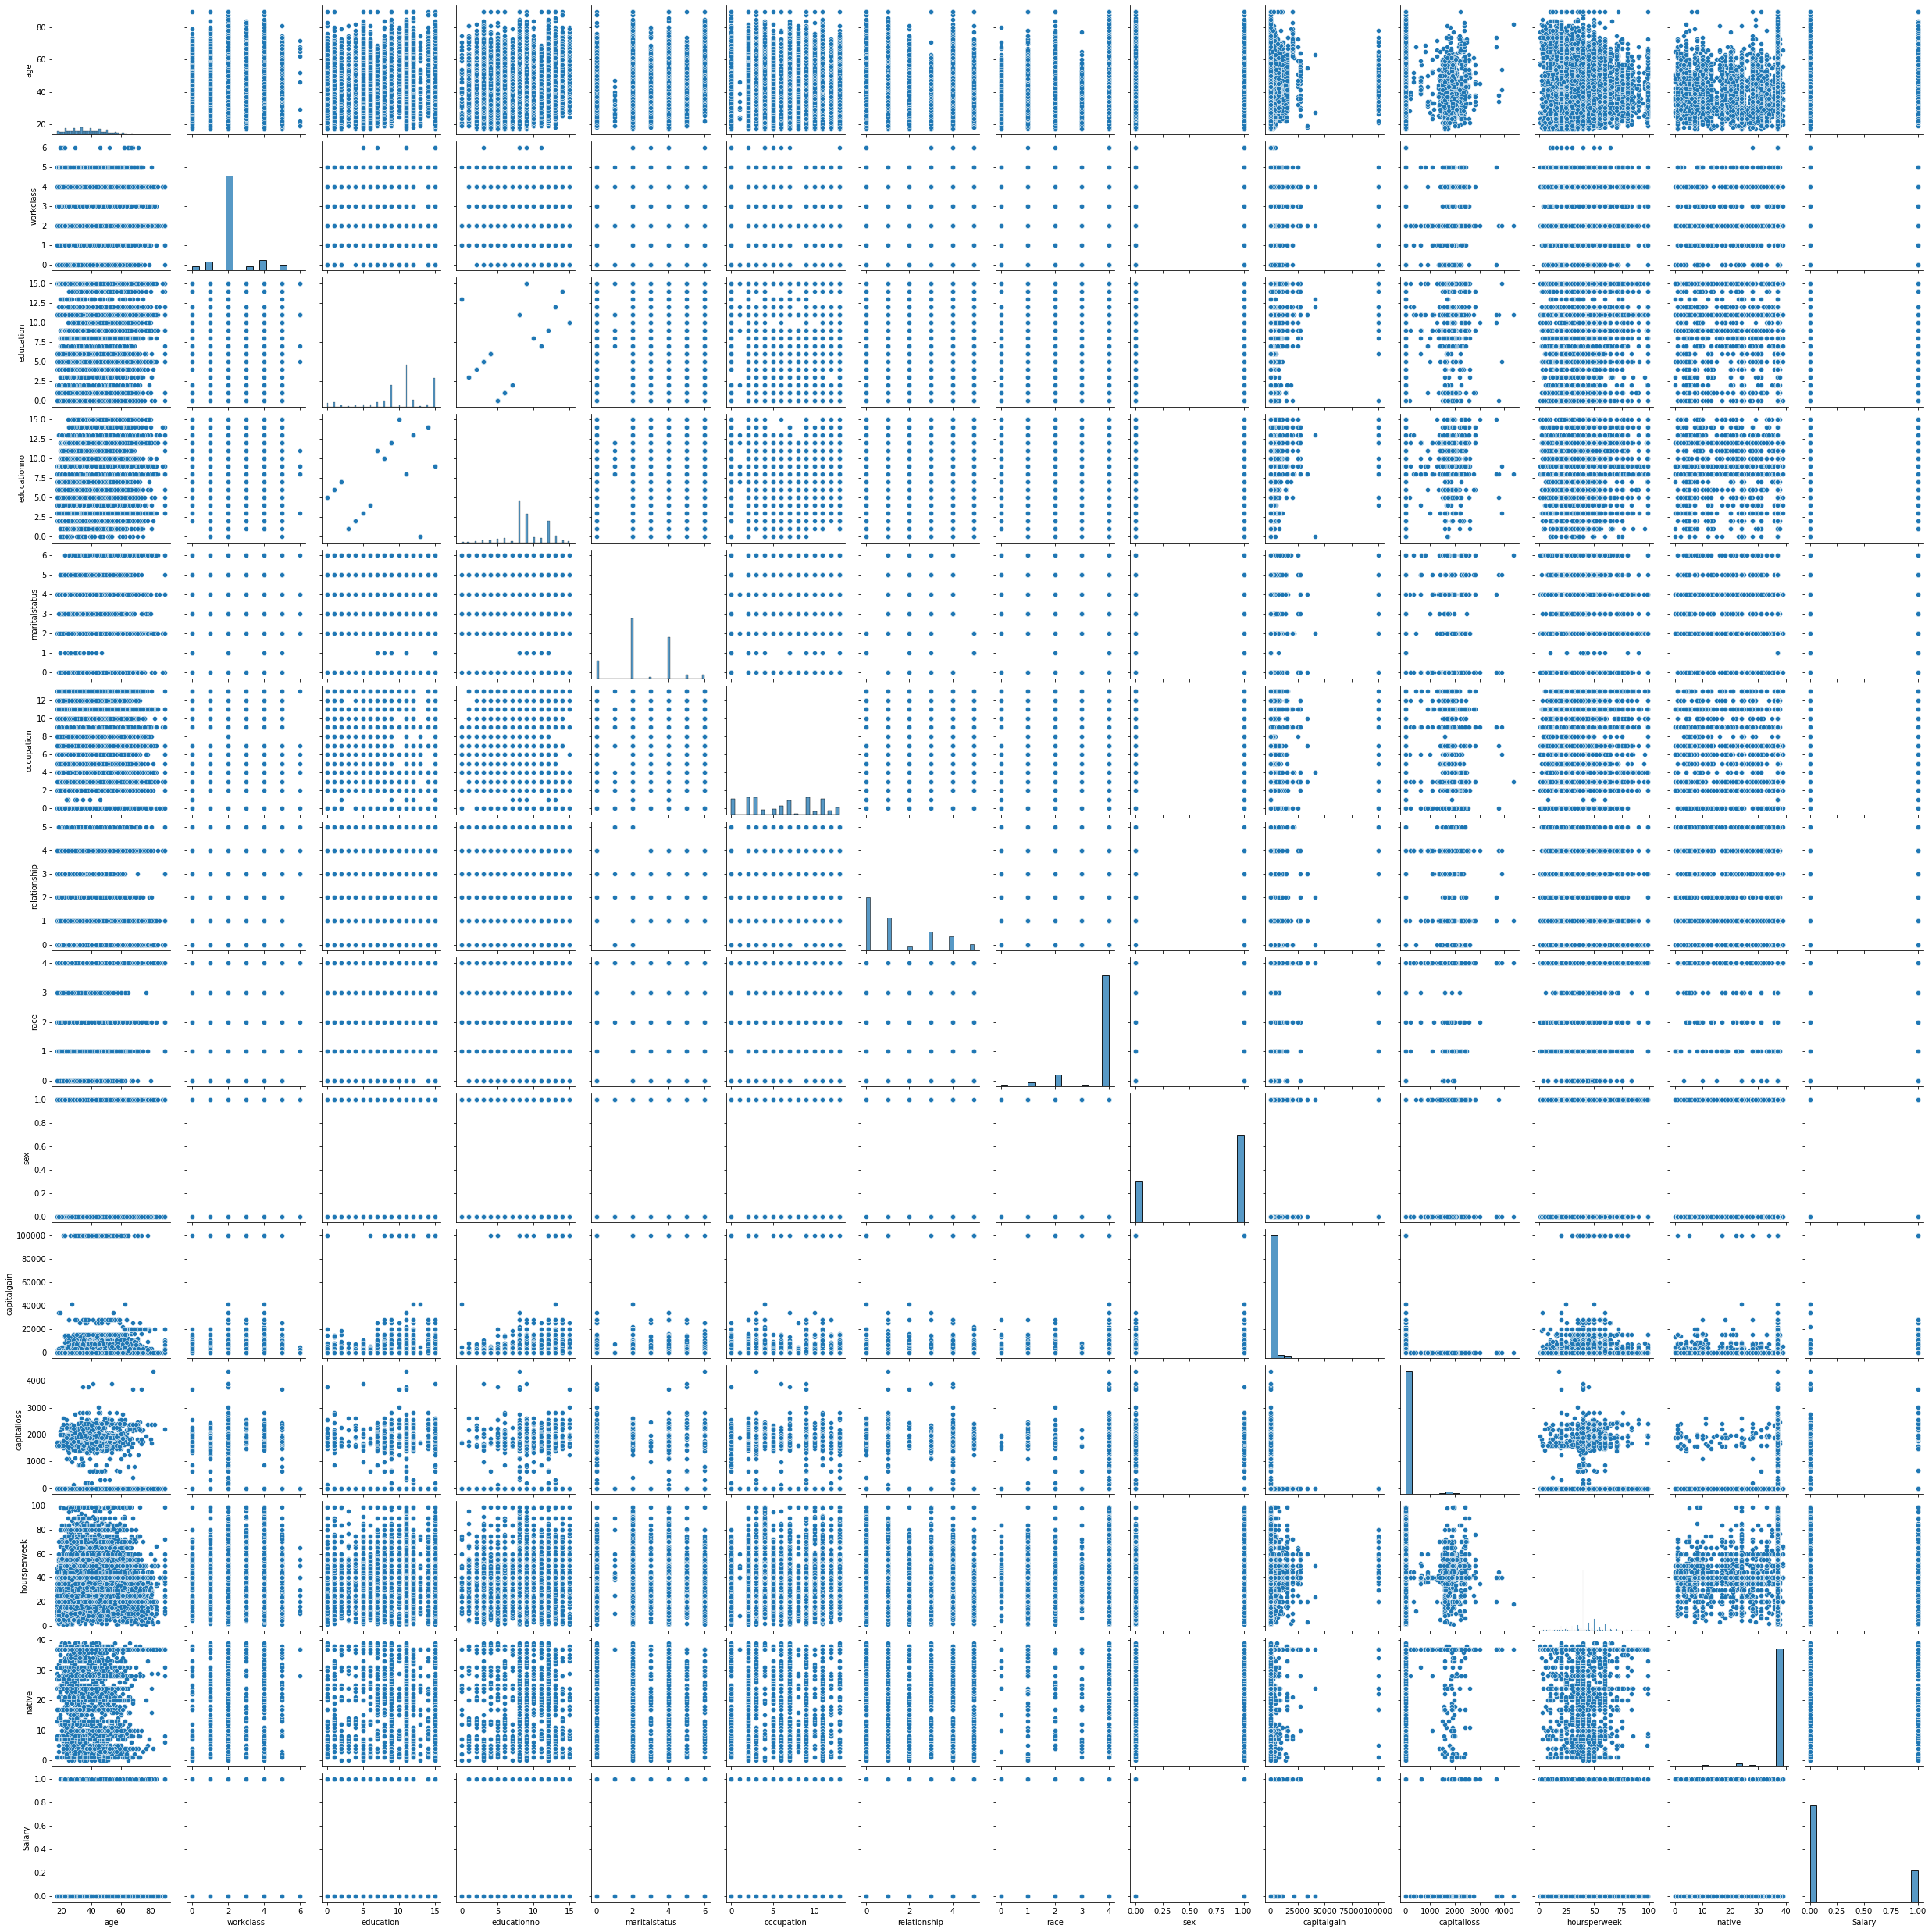

In [35]:
plt.figure(figsize=(30,18))
sns.pairplot(train)

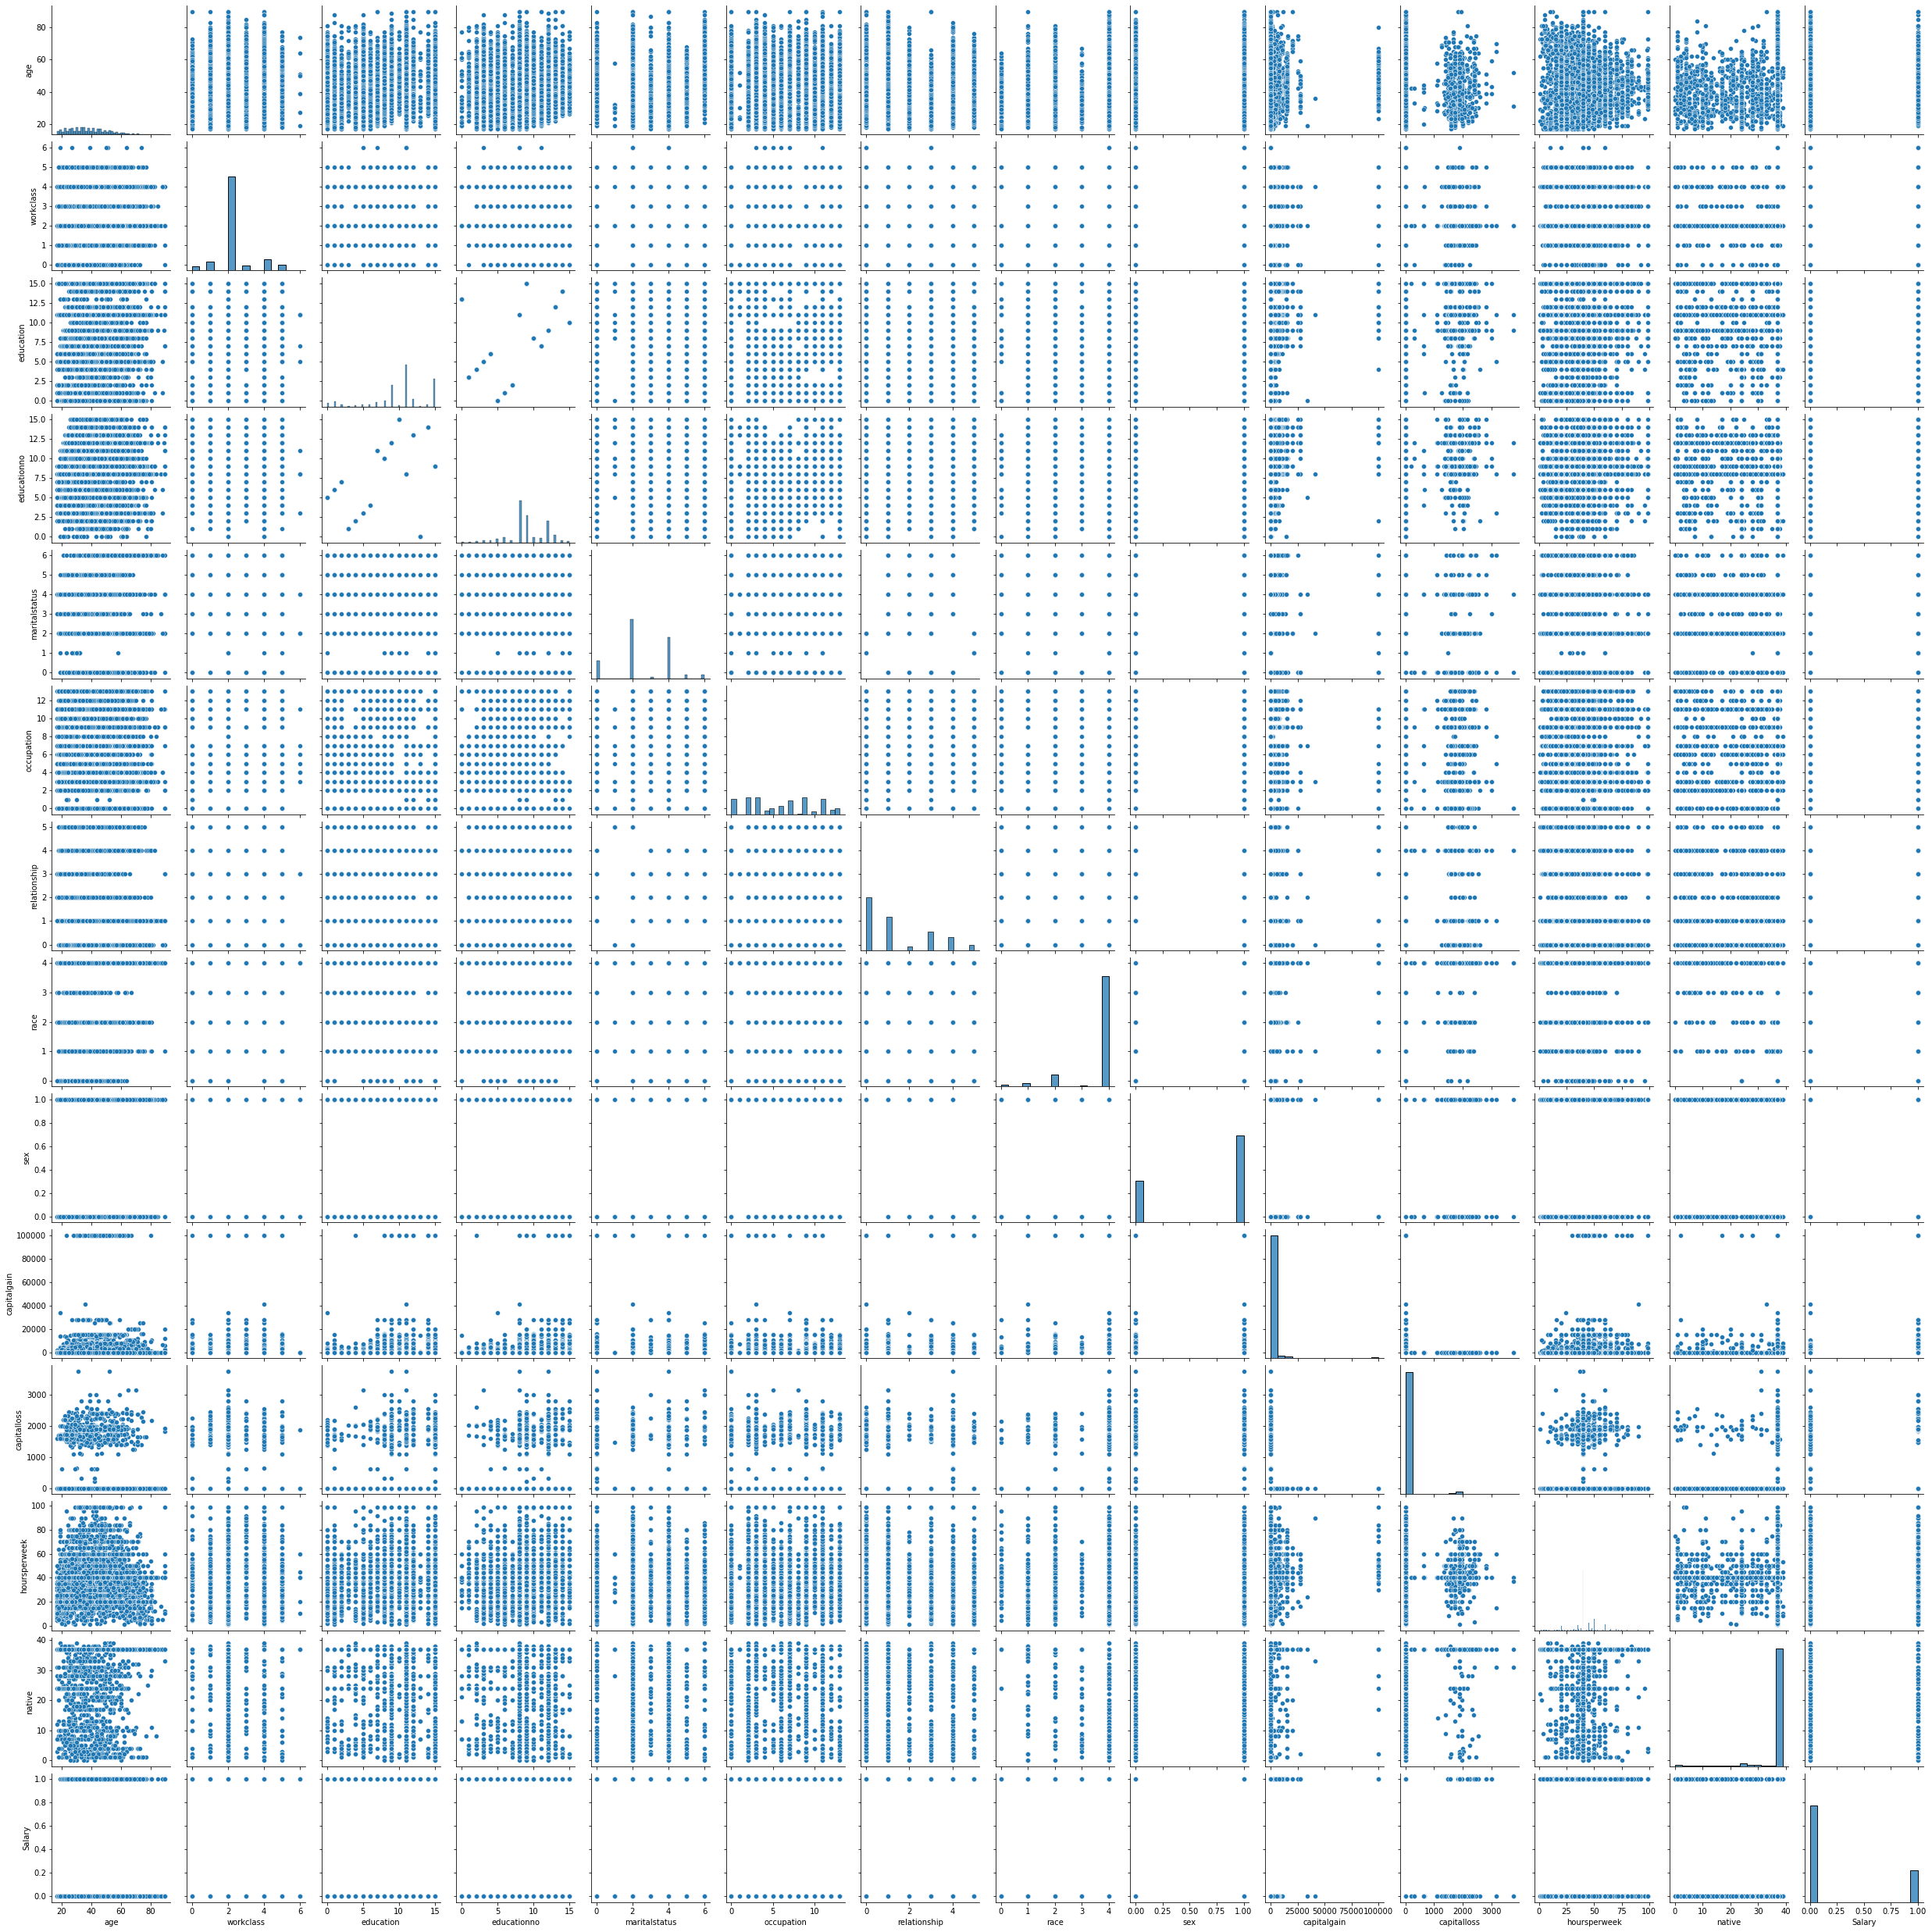

In [36]:
sns.pairplot(test)

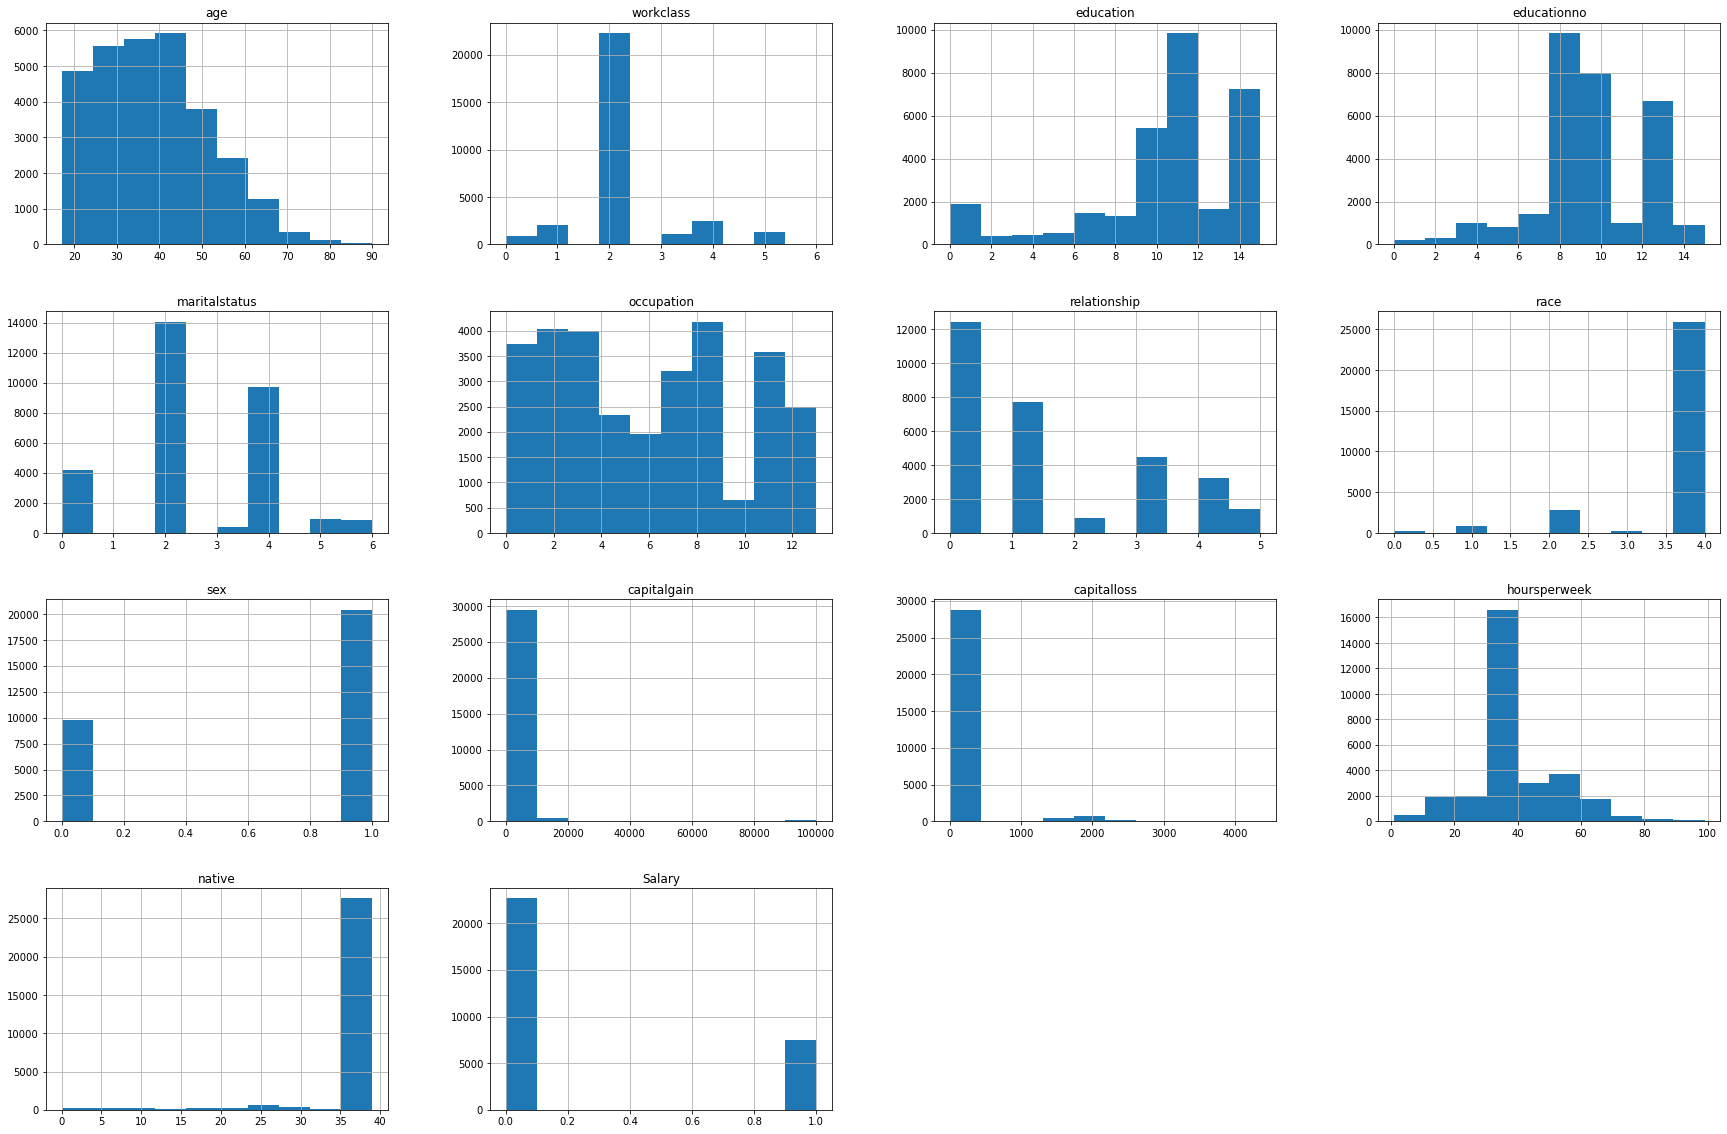

In [37]:
train.hist(figsize=(30,20))
plt.show()

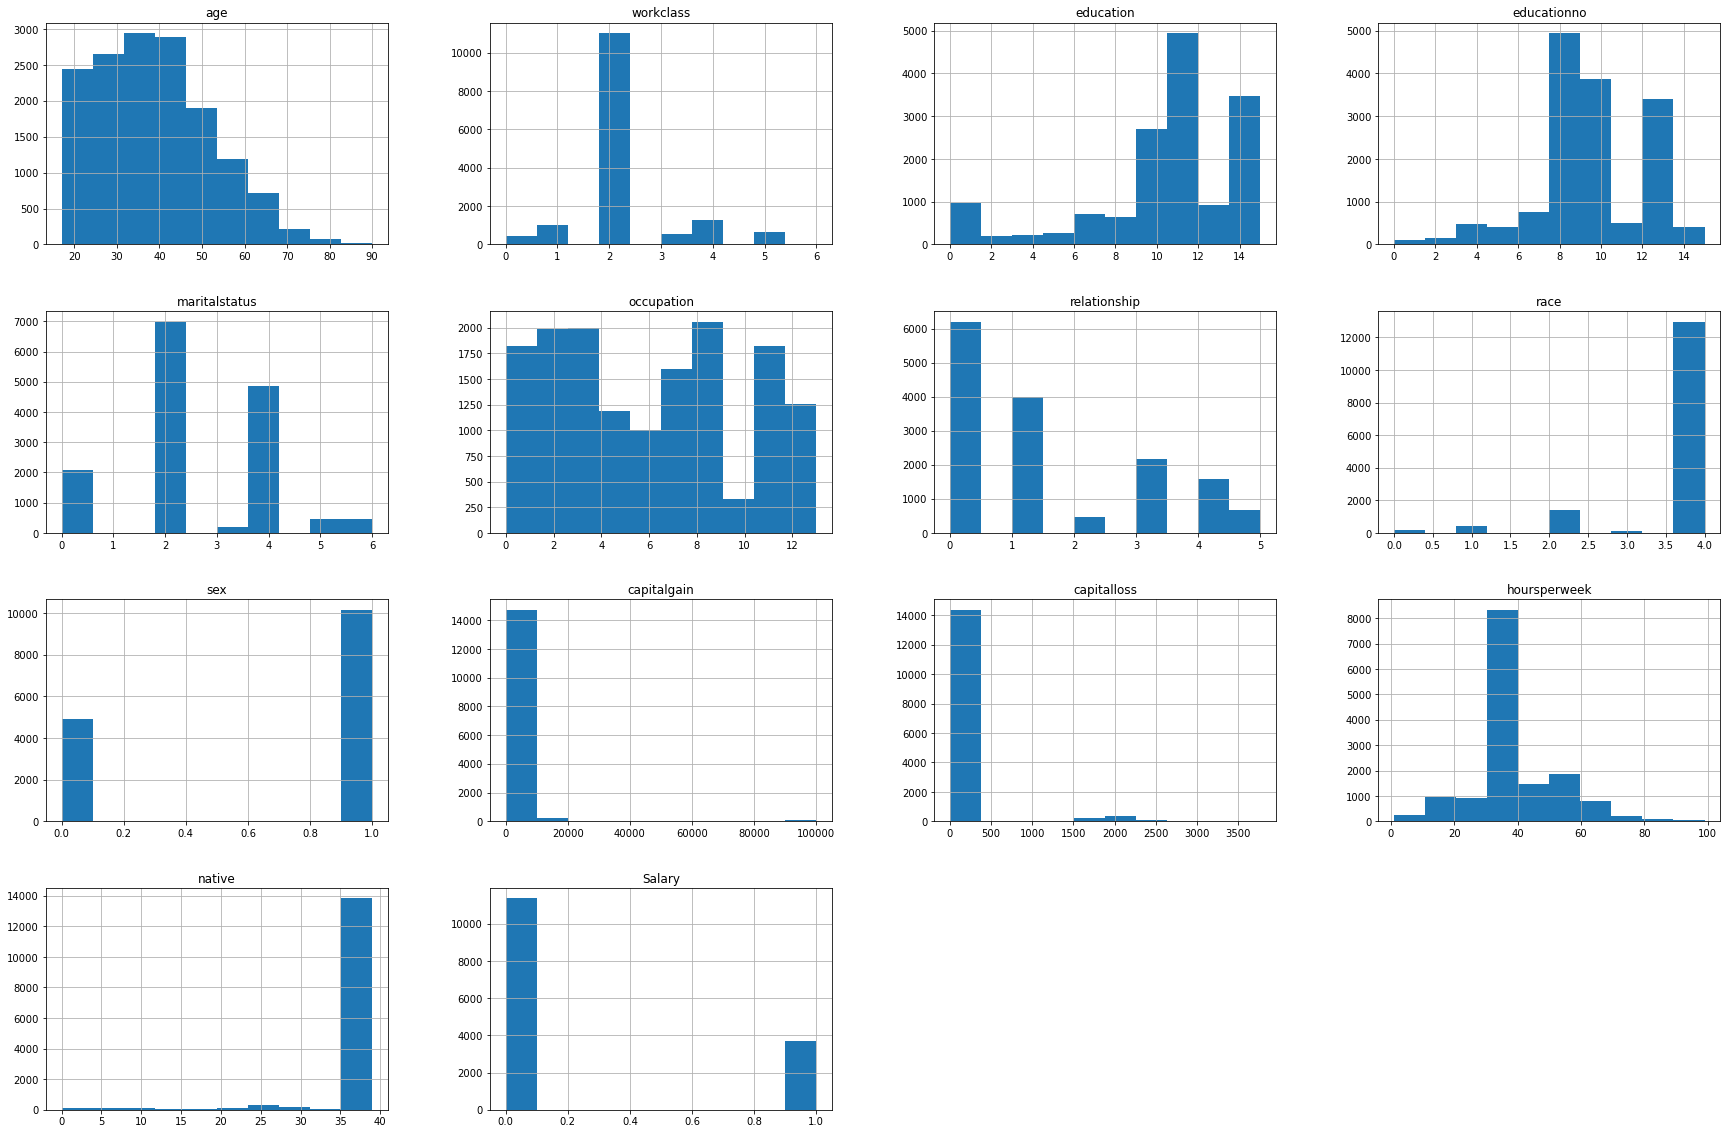

In [38]:
test.hist(figsize=(30,20))
plt.show()

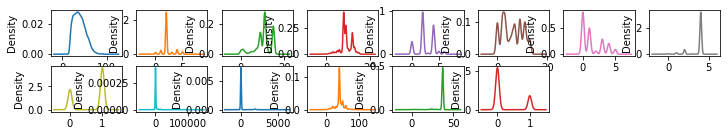

In [15]:
train.plot(kind='density',subplots=True,figsize=(12,8),layout=(8,8),sharex=False,legend=False)
plt.show()

In [10]:
scaler=StandardScaler()

In [11]:
scaler.fit(train.drop('Salary',axis=1))

StandardScaler()

In [12]:
scaled=scaler.transform(train.drop('Salary',axis=1))
train_scaled=pd.DataFrame(scaled,columns=train.columns[:-1])
train_scaled

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.042779,2.935947,-0.349827,1.128898,0.947877,-1.479030,-0.261233,0.385055,0.692771,0.146085,-0.218508,-0.077735,0.266358
1,0.880261,1.887645,-0.349827,1.128898,-0.387243,-0.734533,-0.885712,0.385055,0.692771,-0.147447,-0.218508,-2.331495,0.266358
2,-0.033356,-0.208958,0.174805,-0.439733,-1.722362,-0.238202,-0.261233,0.385055,0.692771,-0.147447,-0.218508,-0.077735,0.266358
3,1.108665,-0.208958,-2.448354,-1.224048,-0.387243,-0.238202,-0.885712,-2.010994,0.692771,-0.147447,-0.218508,-0.077735,0.266358
4,-0.794703,-0.208958,-0.349827,1.128898,-0.387243,0.754461,2.236683,-2.010994,-1.443479,-0.147447,-0.218508,-0.077735,-5.273965
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.870838,-0.208958,-0.874459,0.736740,-0.387243,1.498958,2.236683,0.385055,-1.443479,-0.147447,-0.218508,-0.244681,0.266358
30157,0.118914,-0.208958,0.174805,-0.439733,-0.387243,0.009964,-0.885712,0.385055,0.692771,-0.147447,-0.218508,-0.077735,0.266358
30158,1.489339,-0.208958,0.174805,-0.439733,2.282996,-1.479030,1.612204,0.385055,-1.443479,-0.147447,-0.218508,-0.077735,0.266358
30159,-1.251511,-0.208958,0.174805,-0.439733,0.947877,-1.479030,0.987725,0.385055,0.692771,-0.147447,-0.218508,-1.747187,0.266358


In [13]:
scaler.fit(test.drop('Salary',axis=1))

StandardScaler()

In [14]:
scaled=scaler.transform(test.drop('Salary',axis=1))
test_scaled=pd.DataFrame(scaled,columns=test.columns[:-1])
test_scaled

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,-1.029005,-0.222347,-2.423439,-1.216563,0.933187,0.002725,1.006108,-2.034389,0.695832,-0.145438,-0.219169,-0.078889,0.260581
1,-0.057423,-0.222347,0.190172,-0.434898,-0.395463,-0.494789,-0.881990,0.382230,0.695832,-0.145438,-0.219169,0.750131,0.260581
2,-0.804794,-1.257126,-0.855272,0.737599,-0.395463,0.997755,-0.881990,0.382230,0.695832,-0.145438,-0.219169,-0.078889,0.260581
3,0.391000,-0.222347,1.235617,-0.044066,-0.395463,0.002725,-0.881990,-2.034389,0.695832,0.852624,-0.219169,-0.078889,0.260581
4,-0.356371,-0.222347,-2.684800,-1.607395,0.933187,0.251483,-0.252624,0.382230,0.695832,-0.145438,-0.219169,-0.907909,0.260581
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.431108,-0.222347,-0.332550,1.128431,0.933187,0.748998,1.006108,0.382230,0.695832,-0.145438,-0.219169,-0.078889,0.260581
15056,0.017315,-0.222347,-0.332550,1.128431,-1.724114,0.748998,-0.252624,0.382230,-1.437128,-0.145438,-0.219169,-0.410497,0.260581
15057,-0.057423,-0.222347,-0.332550,1.128431,-0.395463,0.748998,-0.881990,0.382230,0.695832,-0.145438,-0.219169,0.750131,0.260581
15058,0.391000,-0.222347,-0.332550,1.128431,-1.724114,-1.489819,1.006108,-3.242699,0.695832,0.562734,-0.219169,-0.078889,0.260581


In [15]:
# Dataset is too large . so we are using only 1000 datapoints
x_train=train_scaled.iloc[0:500,0:13]
y_train=train.iloc[0:500,13]

In [16]:
x_test=test_scaled.iloc[0:1000,0:13]
y_test=test.iloc[0:1000,13]

In [17]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((500, 13), (500,), (1000, 13), (1000,))

# GridSearchCV

In [22]:
# this will give best params and best score.
clf=SVC()
param_grid=[{'kernel':['rbf','linear','sigmoid','poly'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11.10,0.1,0.001]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11.1, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5],
                          'kernel': ['rbf', 'linear', 'sigmoid', 'poly']}])

In [23]:
gsv.best_params_,gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'linear'}, 0.8140000000000001)

In [18]:
clf=SVC(C=15,gamma=50,kernel='linear')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
pre=precision_score(y_test,y_pred)*100
rec=recall_score(y_test,y_pred)*100

print('accuracy=',acc)
print('precision=',pre)
print('recall=',rec)
confusion_matrix(y_test,y_pred)

accuracy= 79.60000000000001
precision= 73.0
recall= 29.2


array([[723,  27],
       [177,  73]], dtype=int64)

In [21]:
clf =SVC(C=1,gamma=15,kernel='poly')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
pre=precision_score(y_test,y_pred)*100
rec=recall_score(y_test,y_pred)*100

print('precision=',pre)
print('recall=',rec)
print('Accuracy=',acc)
confusion_matrix(y_test,y_pred)

precision= 42.721518987341774
recall= 54.0
Accuracy= 70.39999999999999


array([[569, 181],
       [115, 135]], dtype=int64)

In [19]:
clf=SVC(C=15,gamma=50,kernel='sigmoid')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
pre=precision_score(y_test,y_pred)*100
rec=recall_score(y_test,y_pred)*100

print('precision=',pre)
print('recall=',rec)
print('accuracy=',acc)
confusion_matrix(y_test,y_pred)


precision= 34.73282442748092
recall= 36.4
accuracy= 67.0


array([[579, 171],
       [159,  91]], dtype=int64)

In [20]:
clf=SVC(C=15,gamma=50,kernel='rbf')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
pre=precision_score(y_test,y_pred)*100
rec=recall_score(y_test,y_pred)*100

print('precision=',pre)
print('recall=',rec)
print('accuracy=',acc)
confusion_matrix(y_test,y_pred)

precision= 60.0
recall= 1.2
accuracy= 75.1


array([[748,   2],
       [247,   3]], dtype=int64)

* linear is giving the highest accuracy

# SVM model with Hyper parameter

In [23]:
hp=SVC(kernel='rbf',gamma=15,C=1)
hp.fit(x_train,y_train)

SVC(C=1, gamma=15)

In [24]:
y_pred1=hp.predict(x_test)
acc1=accuracy_score(y_test,y_pred1)
pre1=precision_score(y_test,y_pred1)
rec1=recall_score(y_test,y_pred1)

print('accuracy=',acc1)
print('precision=',pre1)
print('recall=',rec1)
confusion_matrix(y_test,y_pred1)

accuracy= 0.747
precision= 0.3333333333333333
recall= 0.012


array([[744,   6],
       [247,   3]], dtype=int64)